<a href="https://colab.research.google.com/github/Munavvarh/CS-301-Intro-to-Data-Science-/blob/main/CS301(Assignment_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import jax
import jax.numpy as jnp
from jax import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import jax
import jax.numpy as jnp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline
from fastai.imports import *
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from jax._src.tree_util import build_tree
from jax.tree_util import tree_structure
from numpy.lib.npyio import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
from google.colab import files
from IPython.display import Image, display
uploaded = files.upload()

Saving Algorithm (GB).JPG to Algorithm (GB).JPG
Saving AlgorithmGB.JPG to AlgorithmGB.JPG


# Background and Documentation


In [ ]:
"""
Gradient boosting is a sort of boosting in machine learning. It is based on the assumption that the best next model, when merged with past models, 
minimizes the overall prediction error. The main concept is to define the desired outcomes for this next model in order to reduce error. How are the 
goals determined? The goal outcome for each instance in the data is determined by how much changing the prediction of that case affects the total prediction error:

   -  If a slight modification in a case's prediction results in a substantial drop in error, the case's next target outcome is a high value. Predictions from the new model 
    that are near to their objectives will aid in lowering error. 

    - If a slight adjustment in a case's prediction results in no change in error, the case's next target outcome is zero. 
    Changing this prediction has no effect on the error.

Gradient boosting gets its name from the fact that goal outcomes for each case are determined depending on 
the gradient of the error with regard to the prediction. In the space of potential predictions for each training example, each new model takes a step in the direction 
of minimizing prediction error.

"""

"\nGradient boosting is a sort of boosting in machine learning. It is based on the assumption that the best next model, when merged with past models, \nminimizes the overall prediction error. The main concept is to define the desired outcomes for this next model in order to reduce error. How are the \ngoals determined? The goal outcome for each instance in the data is determined by how much changing the prediction of that case affects the total prediction error:\n\n   -  If a slight modification in a case's prediction results in a substantial drop in error, the case's next target outcome is a high value. Predictions from the new model \n    that are near to their objectives will aid in lowering error. \n\n    - If a slight adjustment in a case's prediction results in no change in error, the case's next target outcome is zero. \n    Changing this prediction has no effect on the error.\n\nGradient boosting gets its name from the fact that goal outcomes for each case are determined depend

In [ ]:
# Resources used Friedman’s paper "https://jerryfriedman.su.domains/ftp/trebst.pdf"

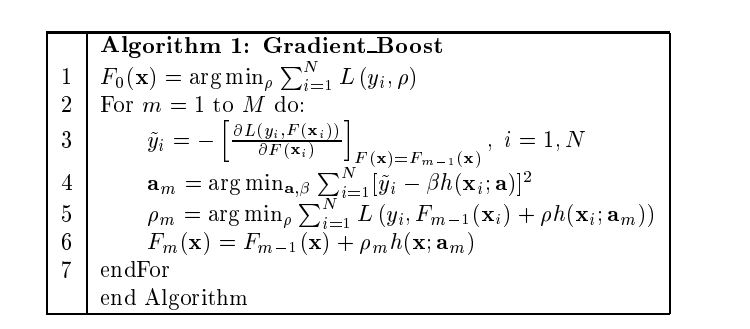

In [ ]:
# The Gradient Boosting Algorithm:
Image('Algorithm (GB).JPG', width=600) 

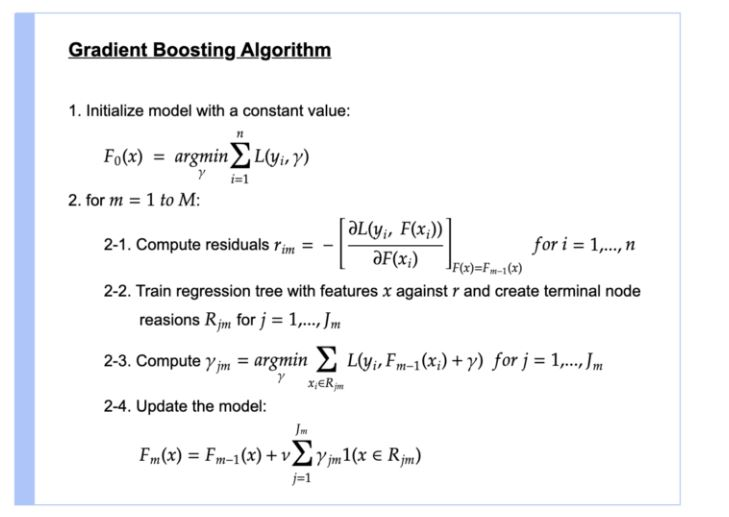

In [ ]:
Image('AlgorithmGB.JPG', width=600)

In [ ]:
"""
Explaning the equation : 

Step 1: The first step is creating an initial constant prediction value F₀. L is the loss function and we are using log loss (or more generally called cross-entropy loss) for it.
Step 2: The whole step2 processes from 2–1 to 2–4 are iterated M times. M denotes the number of trees we are creating and the small m represents the index of each tree.
Step 2-1: We are calculating residuals rᵢ𝑚 by taking a derivative of the loss function with respect to the previous prediction F𝑚-₁ and multiplying it by −1. 
As you can see in the subscript index, rᵢ𝑚 is computed for each single sample i. Some of you might be wondering why we are calling this rᵢ𝑚 residuals. 
This value is actually negative gradient that gives us the directions (+/−) and the magnitude in which the loss function can be minimized.
Step 2-2: j represents a terminal node (i.e. leave) in the tree, m denotes the tree index, and capital J means the total number of leaves.
Step 2-3: We are searching for γⱼ𝑚 that minimizes the loss function on each terminal node j. Σxᵢ∈Rⱼ𝑚 L means we are aggregating the loss on all the xᵢs that belong to the terminal node Rⱼ𝑚. 
Step 2-4: In the final step, we are updating the prediction of the combined model F𝑚. γⱼ𝑚1(x ∈ Rⱼ𝑚) means that we pick the value γⱼm if a given x falls in a terminal node Rⱼ𝑚. 
As all the terminal nodes are exclusive, any given single x falls into only a single terminal node and corresponding γⱼ𝑚 is added to the previous prediction F𝑚-₁ and then it makes
the updated prediction F𝑚.
"""

'\nExplaning the equation : \n\nStep 1: The first step is creating an initial constant prediction value F₀. L is the loss function and we are using log loss (or more generally called cross-entropy loss) for it.\nStep 2: The whole step2 processes from 2–1 to 2–4 are iterated M times. M denotes the number of trees we are creating and the small m represents the index of each tree.\nStep 2-1: We are calculating residuals rᵢ𝑚 by taking a derivative of the loss function with respect to the previous prediction F𝑚-₁ and multiplying it by −1. \nAs you can see in the subscript index, rᵢ𝑚 is computed for each single sample i. Some of you might be wondering why we are calling this rᵢ𝑚 residuals. \nThis value is actually negative gradient that gives us the directions (+/−) and the magnitude in which the loss function can be minimized.\nStep 2-2: j represents a terminal node (i.e. leave) in the tree, m denotes the tree index, and capital J means the total number of leaves.\nStep 2-3: We are searchin

#Coding from Scratch Using JAX

In [ ]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [ ]:
i = 50
x = np.arange(0,i)
x = pd.DataFrame({'x':x})

In [ ]:
y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

In [ ]:
class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

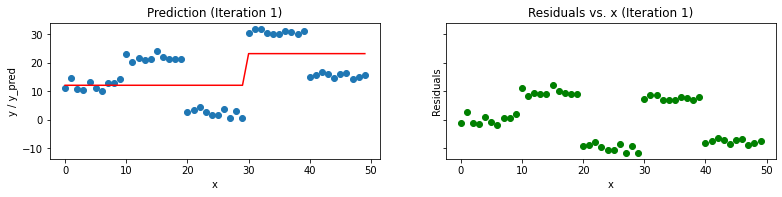

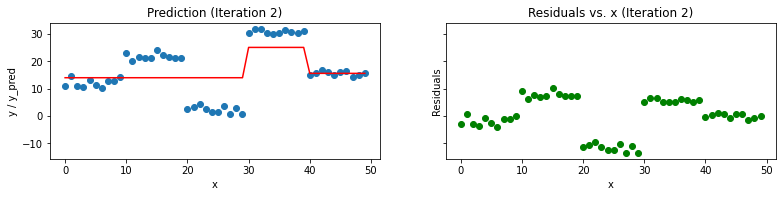

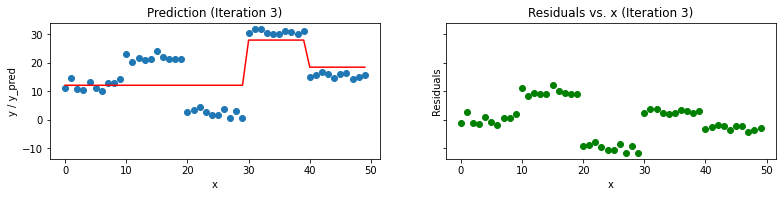

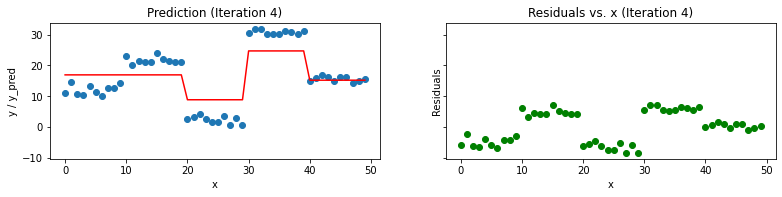

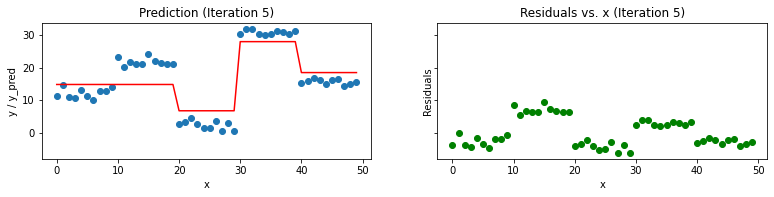

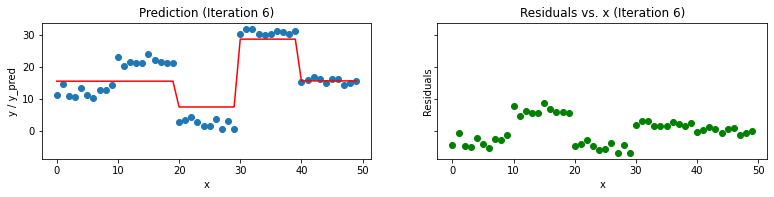

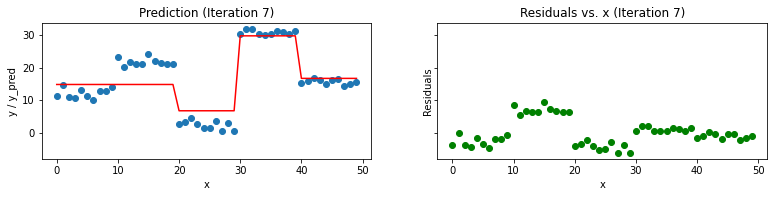

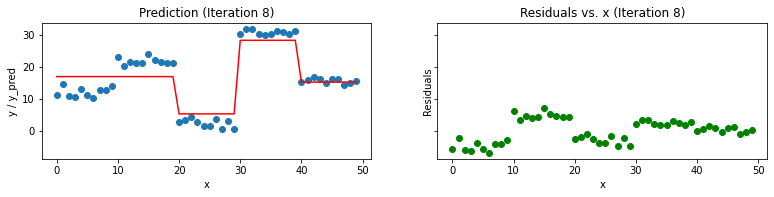

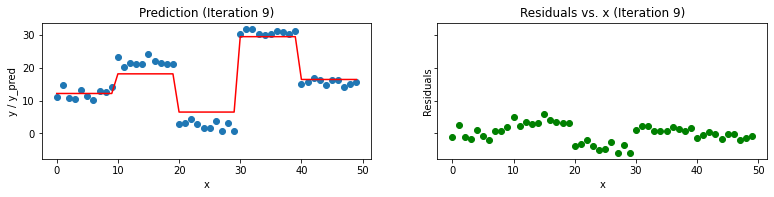

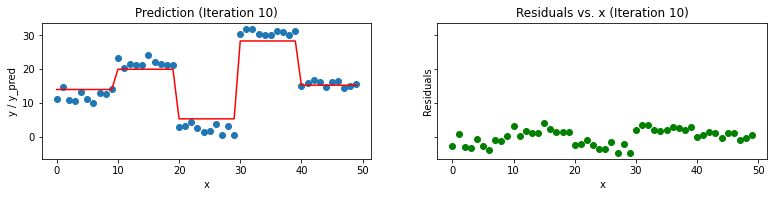

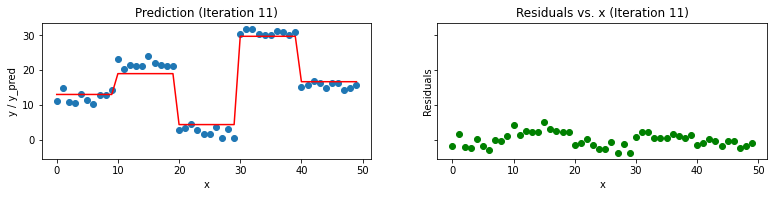

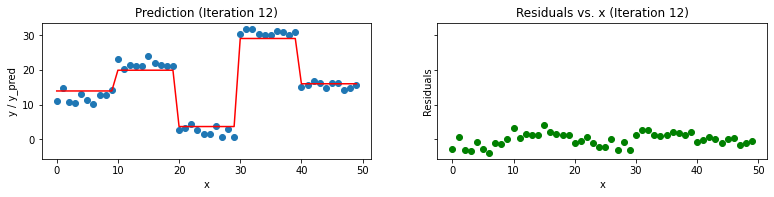

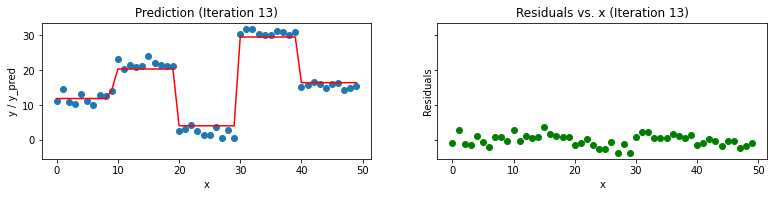

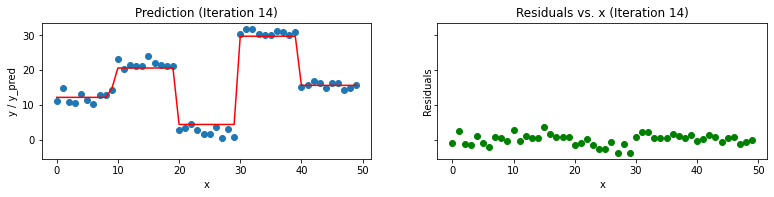

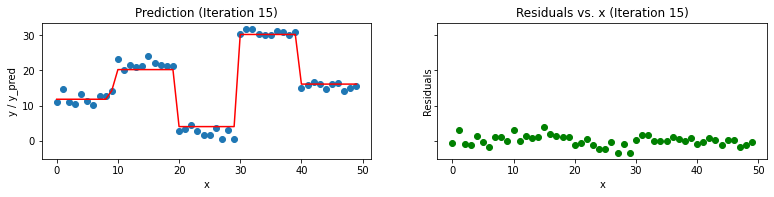

In [ ]:
xi = x # initialization of input
yi = y # initialization of target
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

for i in range(15): # loop will make 15 trees (n_estimators). 
    tree = DecisionTree(xi,yi) # DecisionTree scratch code can be found in shared github/kaggle link. It just create a single decision tree with provided min. sample leaf
    tree.find_better_split(0)  # For selected input variable, this splits (n) data so that std. deviation of target variable in both splits is minimum as compared to all other splits
    r = np.where(xi == tree.split)[0][0]  
    left_idx = np.where(xi <= tree.split)[0] # index lhs of split
    right_idx = np.where(xi > tree.split)[0] # index rhs of split
    predi = np.zeros(n)
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
    predi = predi[:,None] 
    predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual
    ei = y - predf     
    yi = ei 
    
    # plotting after prediction
    xa = np.array(x.x) # column name of x is x 
    order = np.argsort(xa)
    xs = np.array(xa)[order]
    ys = np.array(predf)[order]
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))
    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')
    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')

# EMG Dataset

In [ ]:
! cp "/content/drive/MyDrive/EMG Physical Action Data Set (1).rar"


cp: missing destination file operand after '/content/drive/MyDrive/EMG Physical Action Data Set (1).rar'
Try 'cp --help' for more information.


In [ ]:
! pip install unrar


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! unrar x "/content/drive/MyDrive/EMG Physical Action Data Set (1).rar"  


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/EMG Physical Action Data Set (1).rar

Creating    EMG Physical Action Data Set                              OK
Extracting  EMG Physical Action Data Set/readme.txt                        0%  OK 
Creating    EMG Physical Action Data Set/sub1                         OK
Creating    EMG Physical Action Data Set/sub1/Aggressive              OK
Creating    EMG Physical Action Data Set/sub1/Aggressive/log          OK
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Elbowing.log       0%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/FrontKicking.log       0%  1%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Hamering.log       1%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/Headering.log       1%  2%  OK 
Extracting  EMG Physical Action Data Set/sub1/Aggressive/log/

In [ ]:
subs = ["sub1","sub2","sub3","sub4"] 
verbose = True
dataVal = pd.DataFrame()
fileData = {"Elbowing.txt": 0, "Frontkicking.txt": 1,"Hamering.txt": 2,"Headering.txt": 3,"Kneeing.txt": 4, "Pulling.txt": 5,"Punching.txt": 6,"Pushing.txt": 7,"Sidekicking.txt" : 8, "Slapping.txt" : 9,
    "Bowing.txt" : 10,"Clapping.txt": 11,"Handshaking.txt": 12,"Hugging.txt":13,"Jumping.txt":14,"Running.txt":15,"Seating.txt":16,"Standing.txt":17, "Walking.txt":18,"Waving.txt":19,
}


In [ ]:
# Normal data set
for sub in subs:   # itreating over the four sub folders
  dir_name = f"/content/EMG Physical Action Data Set/{sub}/Normal/txt"
  os.chdir(dir_name)
  for labeled_file in os.listdir(os.getcwd()):
    data = pd.read_csv(labeled_file, sep='\t', comment='#', na_values=['Nothing'],names=["0", "1", "2", "3","4","5","6","7"])
    data.insert(8,column="label",value=fileData[labeled_file],allow_duplicates=True)
    dataVal = dataVal.append(data)
    print(f"File name: {labeled_file}\n----\n{data}")

File name: Standing.txt
----
       0   1   2    3   4   5   6   7  label
0    -40 -28 -16  -63  -7 -19 -39 -33     17
1    -35 -70   2  -46 -29 -24 -43 -35     17
2    -51 -76 -24  -68 -55 -18 -71 -25     17
3    -34 -56 -30 -102 -47 -48 -66 -68     17
4    -33 -80 -23  -83 -53 -29 -58 -29     17
...   ..  ..  ..  ...  ..  ..  ..  ..    ...
9720 -21 -12 -10  -16  28  33  15  17     17
9721 -12  12 -59   -6  14  27  13  25     17
9722   3   8 -36    0  25  18  16   4     17
9723  16  18 -24  -13   1  44  -4   2     17
9724  20  20 -47  -38   1  44  -4   2     17

[9725 rows x 9 columns]
File name: Jumping.txt
----
        0     1    2     3     4     5     6     7  label
0     -29  -552   65  -764 -4000  2046  4000 -4000     14
1    -132 -1025   -6 -1327 -4000  1929  4000 -4000     14
2     -58  -427  122  -865 -3785  1638  4000 -4000     14
3       4  -188  135  -401  -539  1344  4000 -4000     14
4    -103  -164  116   236  1515  1287  4000 -4000     14
...   ...   ...  ...   ...   .

In [ ]:
# aggressive data set
for sub in subs: # itreating over the four sub folders
  dir_name = f"/content/EMG Physical Action Data Set/{sub}/Aggressive/txt"
  os.chdir(dir_name)
  for labeled_file in os.listdir(os.getcwd()):
    data = pd.read_csv(labeled_file, sep='\t', comment='#', na_values=['Nothing'],names=["0", "1", "2", "3","4","5","6","7"])
    data.insert(8,column="label",value=fileData[labeled_file],allow_duplicates=True)
    dataVal = dataVal.append(data)
    print(f"File name: {labeled_file}\n----\n{data}")



File name: Pulling.txt
----
         0    1     2     3     4     5     6     7  label
0     1045 -987 -4000  -890  2581  4000 -1071  1011      5
1     1441 -663 -4000 -1805  2516  4000  -876  1240      5
2      692 -151 -4000 -2765  2516  4000  -917  1236      5
3      112  907 -4000  -515  2443  3463  -792  1085      5
4     -392  839 -1172   655  2320  2450  -631  1071      5
...    ...  ...   ...   ...   ...   ...   ...   ...    ...
9654  -233  -36  -389   209 -1571  1277  1406 -3480      5
9655  -136  -45  -160   221 -2224  1144  1278 -3185      5
9656  -126  -44   -60   195 -2895  1069   991 -2881      5
9657   -98  -49   148   153 -3237   997   641 -2621      5
9658     2  -72   284   154 -3237   997   641 -2621      5

[9659 rows x 9 columns]
File name: Elbowing.txt
----
         0    1     2    3     4    5     6     7  label
0     -245  266  2615  -29 -4000 -549 -4000  4000      0
1     -814  391   -22 -277 -4000 -130 -4000  4000      0
2     -445  257 -3628 -428 -4000   97 -

In [ ]:
#split data into x and y
dataVal.replace([np.inf, -np.inf], np.nan, inplace=True)
dataVal = dataVal.replace([np.inf, -np.inf], np.nan)
dataVal = dataVal.dropna()
dataVal = dataVal.reset_index()
x_pred = dataVal.iloc[:,:-1]
y_pred = dataVal.iloc[:,-1]

In [ ]:
accVal = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_pred, y_pred)
accVal.score(x_pred, y_pred)